# 数据准备

In [1]:
# 导入所用的包
import numpy as np
import torch
from torch import nn,optim
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# 导入数据
dataset = datasets.load_iris()

In [3]:
# 打印数据的描述部分
print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
# 打印数据，可直观观察到data 和 target数组
print(dataset)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [5]:
# 二八比例拆分训练集和测试集
input, x_test, label, y_test = train_test_split(dataset.data, dataset.target, test_size=0.2, random_state=42)

Tensor(张量)：可以运行在gpu上的多维数据~~而已~~

torch.Size本质上是tuple元组，支持tuple的一切操作，元组一旦创建后不能被修改，起到保护数据的作用，可用于固定搭配的场景。

In [6]:
# 数据张量化
input = torch.FloatTensor(input)
label = torch.LongTensor(label)
x_test = torch.FloatTensor(x_test)
y_test = torch.LongTensor(y_test)

In [7]:
label_size = int(np.array(label.size()))  # torch数组->numpy数组->数

In [8]:
print(label.size())
print(np.array(label.size()))
print(label_size)

torch.Size([120])
[120]
120


# 神经网络搭建

搭建神经网络 它有着**两个隐藏层**,**一个输出层**

填写各层**输入输出参数**以及**激活函数**

两个隐藏层均使用**线性模型和relu激活函数** 输出层使用**softmax函数**(dim参数设为1)

Softmax函数：

定义：该元素的指数，与所有元素指数和的比值

作用：将多个神经元的输出，映射到（0,1）区间内，概率归一化，从而进行多分类。选择概率大的值，但并不意味着只选择真实值大的值，从而更具有统计意义的概率

In [9]:
class NET(nn.Module):
    def __init__(self, n_feature, n_hidden1,n_hidden2, n_output):
        super(NET, self).__init__()
        self.hidden1 = nn.Linear(n_feature, n_hidden1)
        self.relu1 = nn.ReLU()
 
        self.hidden2 = nn.Linear(n_hidden1, n_hidden2)
        self.relu2 = nn.ReLU()
 
        self.out = nn.Linear(n_hidden2, n_output)
        self.softmax = nn.Softmax(dim=1)
#前向传播函数
    def forward(self, x):
        hidden1 = self.hidden1(x)
        relu1 = self.relu1(hidden1)
#完善代码:
        hidden2 = self.hidden1(x)
        relu2 = self.relu1(hidden2)
 
        out = relu2
 
        return out
#测试函数
    def test(self, x):
        y_pred = self.forward(x)
        y_predict = self.softmax(y_pred)
 
        return y_predict

In [10]:
# 定义网络结构以及损失函数
#完善代码:根据这个数据集的特点合理补充参数,可设置第二个隐藏层输入输出的特征数均为20
net = NET(n_feature=4, n_hidden1=20, n_hidden2=20, n_output=3)

In [11]:
#选一个你喜欢的优化器
#举个例子 SGD优化器 optimizer = torch.optim.SGD(net.parameters(),lr = 0.02)  # lr 表示学习率
#完善代码:我们替你选择了adam优化器,请补充一行代码
# adam是高级梯度下降算法
optimizer = optim.Adam(net.parameters(),lr=0.02)

In [12]:
#这是一个交叉熵损失函数,不懂它没关系(^_^)
loss_func = torch.nn.CrossEntropyLoss()
costs = []

In [13]:
#完善代码:请设置一个训练次数的变量(这个神经网络需要训练2000次)
time = 2000
# 训练网络
#完善代码:把参数补充完整
for epoch in range(time):
    cost = 0
#完善代码:利用forward和损失函数获得out(输出)和loss(损失)
    out = net(input)
    loss = loss_func(out, label)
#请在下一行注释中回答zero_grad这一行的作用
#调用backward()函数之前都要将梯度清零，如果梯度不清零，pytorch中会将上次计算的梯度和本次计算的梯度累加。
    optimizer.zero_grad()
#完善代码:反向传播 并更新所有参数
    loss.backward()
    optimizer.step()
    cost = cost + loss.cpu().detach().numpy()
    costs.append(cost / label_size)

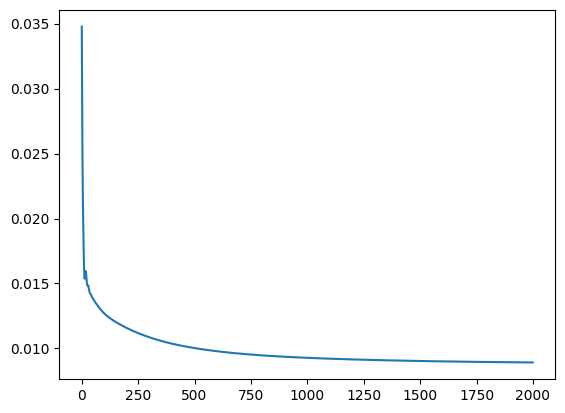

In [14]:
#可视化
plt.plot(costs)
plt.show()

In [15]:
# 测试训练集准确率
out = net.test(input)
prediction = torch.max(out, 1)[1]
pred_y = prediction.numpy()
target_y = label.numpy()
accuracy = float((pred_y == target_y).astype(int).sum()) / float(target_y.size)
print("训练集准确率为", accuracy * 100, "%")

训练集准确率为 92.5 %


In [16]:
# 测试测试集准确率
out1 = net.test(x_test)
prediction1 = torch.max(out1, 1)[1]
pred_y1 = prediction1.numpy()
target_y1 = y_test.numpy()
 
accuracy1 = float((pred_y1 == target_y1).astype(int).sum()) / float(target_y1.size)
print("测试集准确率为", accuracy1 * 100, "%")

测试集准确率为 90.0 %


In [17]:
#至此,你已经拥有了一个简易的神经网络,运行一下试试看吧

#Q
#最后,回答几个简单的问题,本次的问题属于监督学习还是无监督学习呢?batch size又是多大呢?像本题这样的batch size是否适用于大数据集呢,原因是?

#A
# 监督学习
# batch size = none 即一次把所有数据“投喂”
# 不适用于大数据